Random Forest Regression with Gridsearch + Evaluation1: MSE, R-squared

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


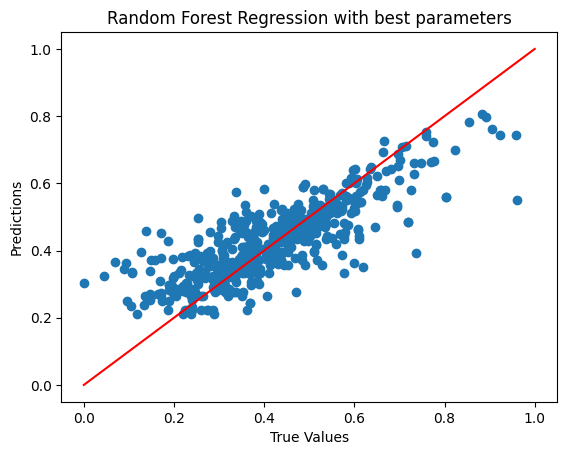

Random Forest Regression Accuracy with best parameters: 64.17% (5.62%)
Random Forest Regression MSE with best parameters: 0.008639505081550914, R2 with best parameters: 0.6547699956109663


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # For Scaling
from sklearn.model_selection import train_test_split, KFold, cross_val_score # for Kfold and the cross valiation score
from sklearn.ensemble import RandomForestRegressor # our Model
from sklearn.model_selection import GridSearchCV # GridsearchCV for find best parameter
from sklearn.metrics import mean_squared_error, r2_score # Evaluation metrics for Regression
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('data/semifinaldata_6.csv')

# One-Hot-Encoding(get_dumies)
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)

# Prepare Dataset
X = encoded_df[['pm25', 'pm10', 'o3', 'so2', 'no2', 'co']]
y = encoded_df['AVG']
Districts = ['District_강원도', 'District_경기도',  'District_경상남도', 'District_경상북도', 'District_광주광역시',  'District_대구광역시',  'District_대전광역시',  'District_부산광역시',  'District_서울특별시', 'District_세종특별자치시',  'District_울산광역시',  'District_인천광역시',  'District_전라남도', 'District_전라북도',  'District_제주특별자치도',  'District_충청남도',  'District_충청북도'   ]

# Standard Scaling for X
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Concatenate Districts with X_scaled
X_scaled_with_districts = encoded_df[Districts].copy()
X_scaled_with_districts[X.columns] = X_scaled

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

kfold = KFold(n_splits=11, random_state=0, shuffle=True) # Best n_split = 11

# Train/Test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the random forest
    'max_depth': [None, 5, 10],  # Maximum depth of each decision tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}
# So the best parameter will chosen by GridSearch 

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train/Test set 
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Reshape y_train
y_train = y_train.ravel()

## Random Forest Regression with best parameters
random_forest_model_best = RandomForestRegressor(**best_params)
random_forest_model_best.fit(X_train, y_train)
y_pred_random_forest_best = random_forest_model_best.predict(X_test)

# Evaluation for model with best parameters
mse_random_forest_best = mean_squared_error(y_test, y_pred_random_forest_best)
r2_random_forest_best = r2_score(y_test, y_pred_random_forest_best)

# Scatter plot for Random Forest Regression with best parameters
plt.scatter(y_test, y_pred_random_forest_best)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression with best parameters")
plt.plot([0, 1], [0, 1], color='red')
plt.show()

# Apply k-Fold Cross Validation for Random Forest with best parameters
results_random_forest_best = cross_val_score(random_forest_model_best, X_train, y_train, cv=kfold)

# Print cross validation score for Random Forest with best parameters
print("Random Forest Regression Accuracy with best parameters: %.2f%% (%.2f%%)" % (results_random_forest_best.mean()*100, results_random_forest_best.std()*100))
print(f"Random Forest Regression MSE with best parameters: {mse_random_forest_best}, R2 with best parameters: {r2_random_forest_best}")




Evaluation2: K-Fold(cross validation Score)

Best K for Random Forest Regression: 14, Accuracy: 62.72%


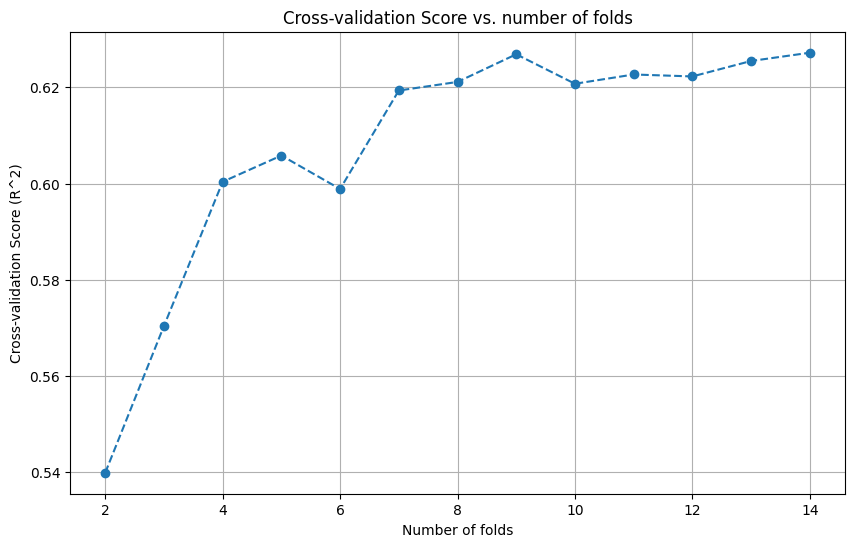

In [3]:
# List to store scores
scores_rf = []

# K values to try
k_values = range(2, 15)

# For each K value...
for k in k_values:
    # Create a KFold object
    kfold = KFold(n_splits=k, random_state=0, shuffle=True)
    
    # Create a Random Forest Regressor model
    random_forest_model = RandomForestRegressor()
    
    # Apply k-Fold Cross Validation
    result_rf = cross_val_score(random_forest_model, X_train, y_train.ravel(), cv=kfold)
    
    # Record average accuracy
    scores_rf.append(result_rf.mean())

# Print the best K and its score for Random Forest Regression
best_k_rf = k_values[scores_rf.index(max(scores_rf))]
print(f"Best K for Random Forest Regression: {best_k_rf}, Accuracy: {max(scores_rf)*100:.2f}%")

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_rf, marker='o', linestyle='dashed')
plt.title('Cross-validation Score vs. number of folds')
plt.xlabel('Number of folds')
plt.ylabel('Cross-validation Score (R^2)')
plt.grid()
plt.show()



FINAL PREDICTION FOR CLUSTERD DATA(That clustered with Clustering Algorithm)

1. initial Clusterd Data

In [6]:
# Read the data from CSV
cluster = pd.read_csv('data/cluster_df.csv')
print(cluster)
# Drop 'City' column, group by 'Cluster', and calculate means
cluster_grouped = cluster.drop('City', axis=1).groupby('Cluster').mean().reset_index()
# cluster_grouped.to_csv('data/cluster_grouped.csv', index=False)
print(cluster_grouped) # grouped data


   City       pm25       pm10        o3       no2       so2        co  Cluster
0    강릉  11.194084  41.243867  0.030321  0.013623  0.003869  0.450054        0
1    거제  11.537721  37.596380  0.032068  0.014198  0.003978  0.415431        0
2    경산   8.886708  39.772440  0.025517  0.015257  0.004065  0.430940        0
3    경주   6.906451  39.722509  0.026765  0.017303  0.004879  0.394697        0
4    계룡   7.610971  28.088019  0.019543  0.012040  0.002531  0.358641        2
..  ...        ...        ...       ...       ...       ...       ...      ...
79   평택  12.146779  58.750000  0.026083  0.021826  0.005326  0.437879        1
80   포천  11.729887  61.995644  0.029007  0.021203  0.005568  0.504937        1
81   포항   8.711662  43.363636  0.030492  0.015061  0.005008  0.515152        0
82   하남  11.861196  45.704545  0.020871  0.030144  0.004129  0.528030        1
83   화성  11.237688  52.522727  0.026174  0.020758  0.004492  0.437879        0

[84 rows x 8 columns]
   Cluster       pm25       p

2. add 'District' column


In [25]:
cluster = pd.read_csv('data/cluster_grouped_2.csv')
print(cluster)

district = pd.read_csv('data/Disease_final.csv')

# Assuming 'district' dataframe has 'City' column
merged_df = pd.merge(cluster, district[['City', 'District']], on='City', how='left')
merged_df.to_csv('data/cluster_grouped_3.csv', index=False)
print(merged_df)


   City    pm25    pm10     o3    no2    so2     co  Cluster
0    강릉  11.194  41.244  0.030  0.014  0.004  0.450        0
1    거제  11.538  37.596  0.032  0.014  0.004  0.415        0
2    경산   8.887  39.772  0.026  0.015  0.004  0.431        0
3    경주   6.906  39.723  0.027  0.017  0.005  0.395        0
4    계룡   7.611  28.088  0.020  0.012  0.003  0.359        2
..  ...     ...     ...    ...    ...    ...    ...      ...
79   평택  12.147  58.750  0.026  0.022  0.005  0.438        1
80   포천  11.730  61.996  0.029  0.021  0.006  0.505        1
81   포항   8.712  43.364  0.030  0.015  0.005  0.515        0
82   하남  11.861  45.705  0.021  0.030  0.004  0.528        1
83   화성  11.238  52.523  0.026  0.021  0.004  0.438        0

[84 rows x 8 columns]
    City    pm25    pm10     o3    no2    so2     co  Cluster District
0     강릉  11.194  41.244  0.030  0.014  0.004  0.450        0      강원도
1     강릉  11.194  41.244  0.030  0.014  0.004  0.450        0      강원도
2     강릉  11.194  41.244  0.030 

3. One-Hot-Encoding the 'District' column

In [26]:
# One-Hot-Encoding(get_dumies) for District
merged_df_encoded = pd.get_dummies(merged_df, columns=['District'], dtype=int)
print(merged_df_encoded)
merged_df_encoded.to_csv('data/cluster_predict.csv', index=False)

    City    pm25    pm10     o3    no2    so2     co  Cluster  District_강원도   
0     강릉  11.194  41.244  0.030  0.014  0.004  0.450        0             1  \
1     강릉  11.194  41.244  0.030  0.014  0.004  0.450        0             1   
2     강릉  11.194  41.244  0.030  0.014  0.004  0.450        0             1   
3     강릉  11.194  41.244  0.030  0.014  0.004  0.450        0             1   
4     강릉  11.194  41.244  0.030  0.014  0.004  0.450        0             1   
..   ...     ...     ...    ...    ...    ...    ...      ...           ...   
416   하남  11.861  45.705  0.021  0.030  0.004  0.528        1             0   
417   화성  11.238  52.523  0.026  0.021  0.004  0.438        0             0   
418   화성  11.238  52.523  0.026  0.021  0.004  0.438        0             0   
419   화성  11.238  52.523  0.026  0.021  0.004  0.438        0             0   
420   화성  11.238  52.523  0.026  0.021  0.004  0.438        0             0   

     District_경기도  ...  District_부산광역시  District_서울

4. Final data that we are going to predict 

In [28]:
# Group the dataframe by Cluster and calculate the mean of pollutant values
cluster_avg = merged_df_encoded.groupby('Cluster')[['pm25', 'pm10', 'o3', 'so2', 'no2', 'co']].mean().reset_index()

# Round the values to 3 decimal places
for col in ['pm25', 'pm10', 'o3', 'so2', 'no2', 'co']:
    cluster_avg[col] = cluster_avg[col].round(3)

# Initialize District columns to 0
for dist in Districts:
    cluster_avg[dist] = 0

# Check each row in the original dataframe
for idx, row in merged_df_encoded.iterrows():
    # For each district in Districts
    for dist in Districts:
        # If this row's District value is 1
        if row[dist] == 1:
            # Set the corresponding cell in cluster_avg to 1
            cluster_avg.loc[cluster_avg['Cluster'] == row['Cluster'], dist] = 1

print(cluster_avg)
cluster_avg.to_csv('data/cluster_final.csv', index=False)


   Cluster    pm25    pm10     o3    so2    no2     co  District_강원도   
0       -1   9.905  43.192  0.033  0.004  0.018  0.418             0  \
1        0  11.847  43.829  0.028  0.004  0.017  0.471             1   
2        1  12.308  49.744  0.025  0.005  0.026  0.554             1   
3        2   9.310  31.182  0.023  0.003  0.012  0.368             1   

   District_경기도  District_경상남도  ...  District_부산광역시  District_서울특별시   
0             1              0  ...               0               0  \
1             1              1  ...               1               0   
2             1              0  ...               0               1   
3             0              1  ...               0               0   

   District_세종특별자치시  District_울산광역시  District_인천광역시  District_전라남도   
0                 0               0               0              0  \
1                 0               0               0              1   
2                 0               1               1              1   
3  

5. [Final]Predict Using the RandomForest Regression model we created!

In [22]:
from sklearn.preprocessing import StandardScaler

# Specify the columns that need scaling
cols_to_scale = ['pm25', 'pm10', 'o3', 'so2', 'no2', 'co']

# Initialize a scaler
scaler = StandardScaler()

# Fit on the train data
scaler.fit(X_scaled_with_districts[cols_to_scale])

# Create a copy of X_new for scaling
X_new_scaled = X_new[cols_to_scale].copy()

# Transform the new data
X_new_scaled = scaler.transform(X_new_scaled)

# Convert X_new_scaled to DataFrame to concatenate with Districts
X_new_scaled_df = pd.DataFrame(X_new_scaled, columns=cols_to_scale, index=X_new.index)

# Concatenate scaled columns with Districts in X_new
X_new_final = pd.concat([X_new[Districts], X_new_scaled_df], axis=1)

# Perform prediction with the trained model
y_pred_new = random_forest_model_best.predict(X_new_final)

# Reshape y_pred_new to 2D array
y_pred_new_2D = y_pred_new.reshape(-1, 1)

# Undo the scaling to get the original values
y_pred_orig = scaler_y.inverse_transform(y_pred_new_2D)

# Print the predicted values
print(y_pred_orig)



[[80.74413333]
 [81.03450092]
 [81.04109616]
 [81.46213759]]
